<a href="https://colab.research.google.com/github/AyishaR/Machine_learning/blob/main/aff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon fine foods reviews

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score
import random
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/amazon ff/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Data cleaning

In [ ]:
print(len(df))

#Removing duplicate entries based on past knowledge.
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(len(df))

568454
393933


In [ ]:
print(len(df))

#Removing the entries where HelpfulnessNumerator > HelpfulnessDenominator.
df = df[df.HelpfulnessNumerator <= df.HelpfulnessDenominator]

print(len(df))

393933
393931


In [ ]:
# Distribution of score values
df['Score'].value_counts()

5    250961
4     56093
1     36306
3     29769
2     20802
Name: Score, dtype: int64

In [ ]:
# Pick only required attributes
df = df[['Time', 'Text', 'Score']]

In [ ]:
# Classifying only as positive and negative

# Remove neutral (score = 3)
df = df[df['Score']!=3]

# Labels as 1 - positive (score > 3) or 0 - negative (score < 3)
df['Score'] = df['Score'].apply(lambda x : 1 if x > 3 else 0)

df

,Time,Text,Score
0,1303862400,I have bought several of the Vitality canned d...,1
1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,0
2,1219017600,This is a confection that has been around a fe...,1
3,1307923200,If you are looking for the secret ingredient i...,0
4,1350777600,Great taffy at a great price. There was a wid...,1
...,...,...,...
568449,1299628800,Great for sesame chicken..this is a good if no...,1
568450,1331251200,I'm disappointed with the flavor. The chocolat...,0
568451,1329782400,"These stars are small, so you can give 10-15 o...",1
568452,1331596800,These are the BEST treats for training and rew...,1


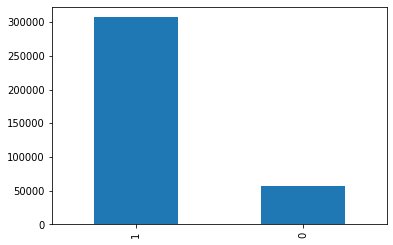

In [ ]:
df['Score'].value_counts().plot(kind='bar')

In [ ]:
# Remove html tags
def removeHTML(sentence):
    regex = re.compile('<.*?>')
    return re.sub(regex, ' ', sentence)

In [ ]:
# Remove HTMLs
def removeURL(sentence):
    regex = re.compile('http[s]?://\S+')
    return re.sub(regex, ' ', sentence)

In [ ]:
# remove numbers, punctuation and any special characters (keep only alphabets)
def onlyAlphabets(sentence):
    regex = re.compile('[^a-zA-Z]')
    return re.sub(regex, ' ', sentence)

In [ ]:
# stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Defining stopwords
stop = nltk.corpus.stopwords.words('english')
stop.remove('not')

print(len(stop))

178


In [ ]:
if 'if' in stop:
    print(True)

True


In [ ]:
sno = nltk.stem.SnowballStemmer('english')    # Initializing stemmer
positive = []    # All words in positive reviews
negative = []    # All words in negative reviews
all_sentences = []    # All cleaned sentences


for x in range(len(df['Text'].values)):
    review = df['Text'].values[x]
    rating = df['Score'].values[x]

    cleaned_sentence = []
    sentence = removeURL(review) 
    sentence = removeHTML(sentence)
    sentence = onlyAlphabets(sentence) 
    sentence = sentence.lower()    

    for word in sentence.split():
        if word not in stop:
            stemmed = sno.stem(word)
            cleaned_sentence.append(stemmed)
            
            if rating == 1 :
                positive.append(stemmed)
            else:
                negative.append(stemmed)

    all_sentences.append(' '.join(cleaned_sentence))

# add as column in dataframe
df['Cleaned'] = all_sentences

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset/amazon ff/cleaned_aff.csv', index=False)

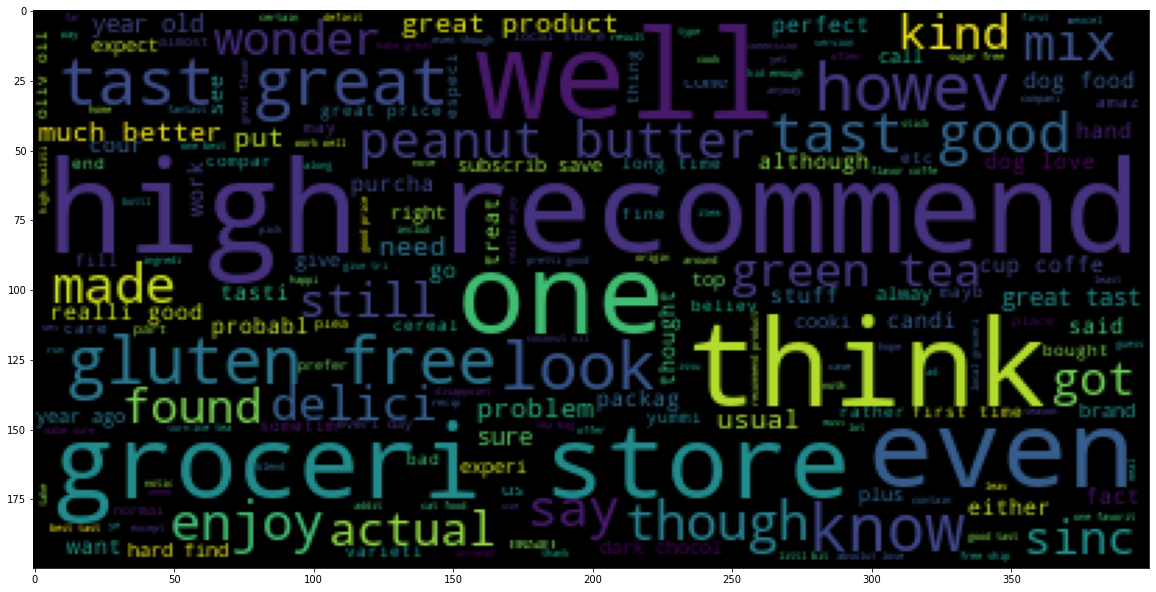

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(positive)))

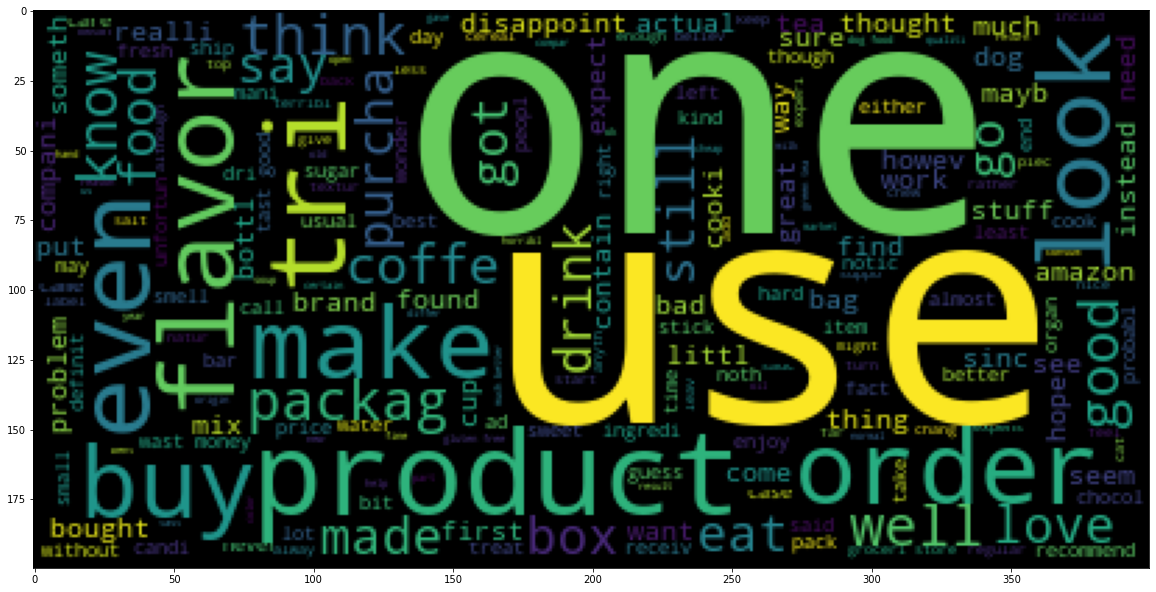

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(negative)))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/amazon ff/cleaned_aff.csv')
df

,Time,Text,Score,Cleaned
0,939340800,this witty little book makes my son laugh at l...,1,witti littl book make son laugh loud recit car...
1,940809600,I can remember seeing the show when it aired o...,1,rememb see show air televis year ago child sis...
2,944092800,Beetlejuice is a well written movie ..... ever...,1,beetlejuic well written movi everyth excel act...
3,944438400,"A twist of rumplestiskin captured on film, sta...",1,twist rumplestiskin captur film star michael k...
4,946857600,Beetlejuice is an excellent and funny movie. K...,1,beetlejuic excel funni movi keaton hilari wack...
...,...,...,...,...
364154,1351209600,"Good price, good quality with convenience. Fu...",1,good price good qualiti conveni fulli met expe...
364155,1351209600,Hands down one of the best milk chocolate bars...,1,hand one best milk chocol bar come uk chocol i...
364156,1351209600,After hearing about the health benefits of dar...,1,hear health benefit dark chocol decid buy loca...
364157,1351209600,I love this tea. It is so refreshing and easil...,1,love tea refresh easili brew share friend amaz...


In [ ]:
df.count()

Time       364159
Text       364159
Score      364159
Cleaned    364155
dtype: int64

In [ ]:
# Few rows has no text to predict from
 
df[df['Cleaned'].isna()]

,Time,Text,Score,Cleaned
19044,1195862400,"<a href=""http://www.amazon.com/gp/product/B000...",1,NaN
24907,1204934400,"<a href=""http://www.amazon.com/gp/product/B000...",1,NaN
57626,1244937600,"<a href=""http://www.amazon.com/gp/product/B001...",1,NaN
111167,1284076800,"<a href=""http://www.amazon.com/gp/product/B002...",1,NaN


In [ ]:
# drop it

df = df.dropna()

df

,Time,Text,Score,Cleaned
0,939340800,this witty little book makes my son laugh at l...,1,witti littl book make son laugh loud recit car...
1,940809600,I can remember seeing the show when it aired o...,1,rememb see show air televis year ago child sis...
2,944092800,Beetlejuice is a well written movie ..... ever...,1,beetlejuic well written movi everyth excel act...
3,944438400,"A twist of rumplestiskin captured on film, sta...",1,twist rumplestiskin captur film star michael k...
4,946857600,Beetlejuice is an excellent and funny movie. K...,1,beetlejuic excel funni movi keaton hilari wack...
...,...,...,...,...
364154,1351209600,"Good price, good quality with convenience. Fu...",1,good price good qualiti conveni fulli met expe...
364155,1351209600,Hands down one of the best milk chocolate bars...,1,hand one best milk chocol bar come uk chocol i...
364156,1351209600,After hearing about the health benefits of dar...,1,hear health benefit dark chocol decid buy loca...
364157,1351209600,I love this tea. It is so refreshing and easil...,1,love tea refresh easili brew share friend amaz...


## Train test split

In [ ]:
df = df.sort_values('Time')

split = int(0.8*len(df))

# The latest reviews are used in the test set.
Xtrain, Xtest = df['Cleaned'][:split], df['Cleaned'][split:]
ytrain, ytest = df['Score'][:split], df['Score'][split:]

print("Train set - ", Xtrain.shape[0])
print("Test set - ", Xtest.shape[0])

Train set -  291324
Test set -  72831


## Bag Of Words

In [ ]:
bow = CountVectorizer()
Xtrain = bow.fit_transform(Xtrain)
Xtest = bow.transform(Xtest)

Xtrain.shape, Xtest.shape

((291324, 64000), (72831, 64000))

In [ ]:
# The values are not in the same range. Need to scale them.

scalar = StandardScaler(with_mean=False)

scalar.fit(Xtrain)
Xtrain = scalar.transform(Xtrain)
Xtest = scalar.transform(Xtest)

## Naive bayes

In [ ]:
# choosing optimal alpha

alphas = np.arange(0, 200, 1)
n_folds = 10

model = MultinomialNB()
cv = TimeSeriesSplit(n_splits = n_folds).split(Xtrain)

gridsearch = GridSearchCV(estimator = model, param_grid = [{'alpha': alphas}], cv = cv, scoring = 'f1', n_jobs = 5)
gridsearch.fit(Xtrain, ytrain)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f94b786da40>,
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=5,
             param_grid=[{'alpha': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50...
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199])}],
             pre_

The optimal alpha =  199


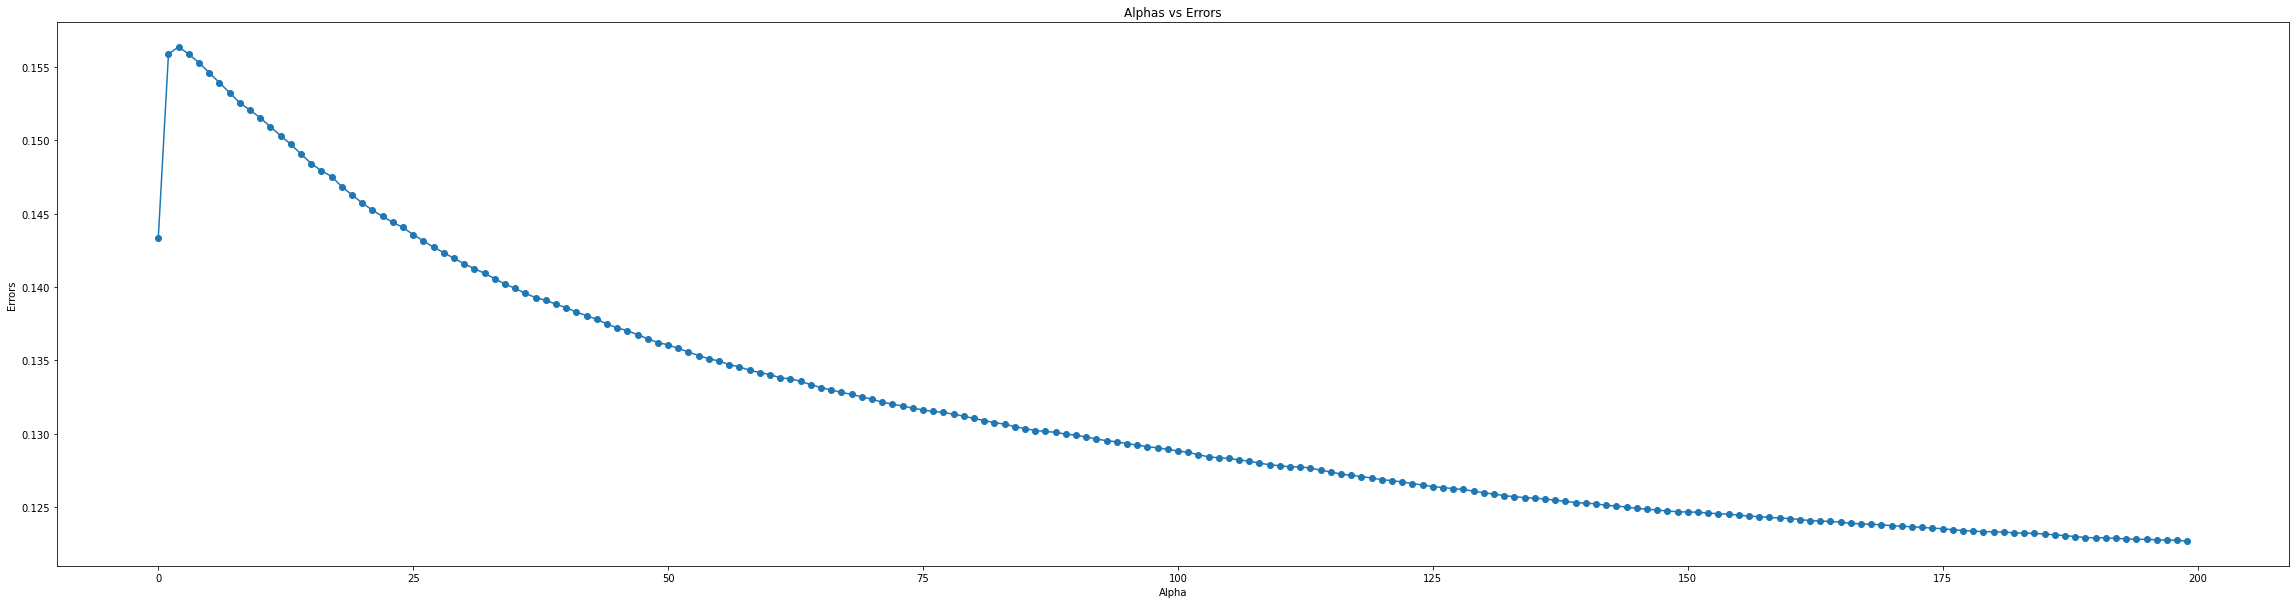

In [ ]:
cv_result = gridsearch.cv_results_         

mts = cv_result["mean_test_score"]      

# error = 1 - accuracy
mse = [1 - x for x in mts]

# Best alpha
optimal_alpha = alphas[mse.index(min(mse))]

print('The optimal alpha = ', optimal_alpha)

plt.figure(figsize=(40,10))
plt.plot(alphas, mse, marker='o')
plt.title('Alphas vs Errors')
plt.xlabel('Alpha')
plt.ylabel('Errors')
plt.show()

In [ ]:
nb = gridsearch.best_estimator_

# Using the best
nb.fit(Xtrain, ytrain)

MultinomialNB(alpha=199, class_prior=None, fit_prior=True)

In [ ]:
ypred = nb.predict(Xtest)

acc = accuracy_score(ytest, ypred)
f1 = f1_score(ytest,ypred, average='weighted')

print("Accuracy = ", acc)
print("F1 score = ", f1)

Accuracy =  0.8490477955815519
F1 score =  0.8427205091564463


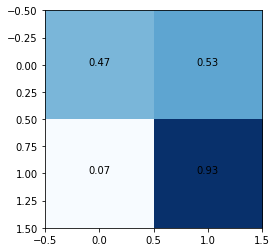

In [ ]:
cm = confusion_matrix(ytest, ypred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):

      
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [ ]:
x = np.random.randint(0, Xtest.shape[0] - 1)

sentence = df['Text'].values[x]
print("Sentence: ", sentence)

cleaned_sentence = []
sentence = removeURL(sentence) 
sentence = removeHTML(sentence)
sentence = onlyAlphabets(sentence) 
sentence = sentence.lower()    

for word in sentence.split():
    if word not in stop:
        stemmed = sno.stem(word)
        cleaned_sentence.append(stemmed)

sentence = [' '.join(cleaned_sentence)]
print("Cleaned sentence: ", sentence[0])

sentence = bow.transform(sentence)
sentence = scalar.transform(sentence)

print("True value: ", df['Score'].values[x])

print("Predicted value: ", nb.predict(sentence)[0])

Sentence:  These ginger chews are too good to be true. I try to limit myself to one a day or I could probably eat the whole box! If you love the taste of peanuts and ginger, there is no finer treat out there.
Cleaned sentence:  ginger chew good true tri limit one day could probabl eat whole box love tast peanut ginger finer treat
True value:  1
Predicted value:  1
